# SQL JOINs in the Farmers Market Database

This notebook demonstrates how to use SQL JOINs to merge data across related tables using Python and MySQL.

In [2]:
import mysql.connector
import pandas as pd

# Establish connection to local MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",  # Never use root in production
    password="William2025!!",  # Replace with your secure password
    database="farmers_market"
)

cursor = conn.cursor()
print(f"Successfully Connected to {conn.database}!")

Successfully Connected to farmers_market!


## 1. LEFT JOIN

Returns all rows from the left table and matched rows from the right.

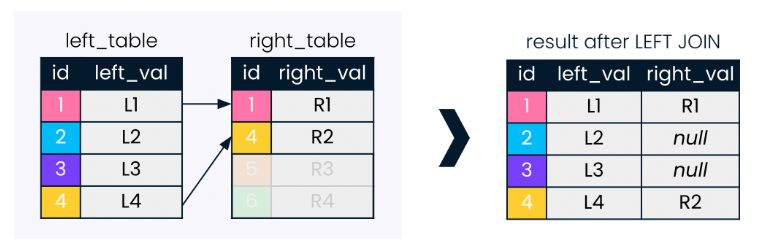

In [6]:
query = '''
SELECT
    product.product_id,
    product.product_name,
    product.product_category_id AS product_prod_cat_id,
    
    product_category.product_category_id AS category_prod_cat_id,
    product_category.product_category_name
    
FROM farmers_market.product
LEFT JOIN farmers_market.product_category
    ON product.product_category_id = product_category.product_category_id;
'''

cursor = conn.cursor()
cursor.execute(query)
df_left_join = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.close()

df_left_join.head()

,product_id,product_name,product_prod_cat_id,category_prod_cat_id,product_category_name
0,1,Habanero Peppers - Organic,1,1,Fresh Fruits & Vegetables
1,2,Jalapeno Peppers - Organic,1,1,Fresh Fruits & Vegetables
2,3,Poblano Peppers - Organic,1,1,Fresh Fruits & Vegetables
3,4,Banana Peppers - Jar,3,3,Packaged Prepared Food
4,5,Whole Wheat Bread,3,3,Packaged Prepared Food


## 2. RIGHT JOIN

Returns all rows from the right table and matched rows from the left.

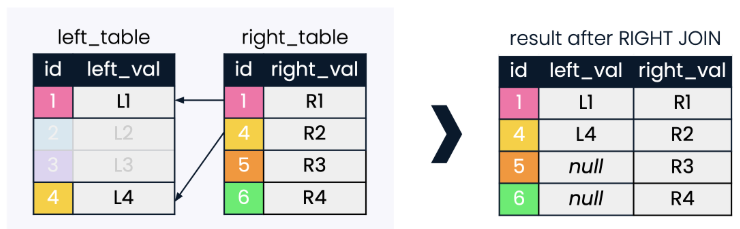

In [10]:
query = '''
SELECT
    product.product_id,
    product.product_name,
    product.product_category_id AS product_prod_cat_id,
    
    product_category.product_category_id AS category_prod_cat_id,
    product_category.product_category_name
FROM farmers_market.product
RIGHT JOIN farmers_market.product_category
ON product.product_category_id = product_category.product_category_id;
'''

cursor = conn.cursor()
cursor.execute(query)
df_right_join = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.close()

df_right_join

,product_id,product_name,product_prod_cat_id,category_prod_cat_id,product_category_name
0,1.0,Habanero Peppers - Organic,1.0,1,Fresh Fruits & Vegetables
1,2.0,Jalapeno Peppers - Organic,1.0,1,Fresh Fruits & Vegetables
2,3.0,Poblano Peppers - Organic,1.0,1,Fresh Fruits & Vegetables
3,9.0,Sweet Potatoes,1.0,1,Fresh Fruits & Vegetables
4,12.0,Baby Salad Lettuce Mix - Bag,1.0,1,Fresh Fruits & Vegetables
5,13.0,Baby Salad Lettuce Mix,1.0,1,Fresh Fruits & Vegetables
6,14.0,Red Potatoes,1.0,1,Fresh Fruits & Vegetables
7,15.0,Red Potatoes - Small,1.0,1,Fresh Fruits & Vegetables
8,16.0,Sweet Corn,1.0,1,Fresh Fruits & Vegetables
9,17.0,Carrots,1.0,1,Fresh Fruits & Vegetables


## 3. INNER JOIN

Returns only rows that match in both tables.

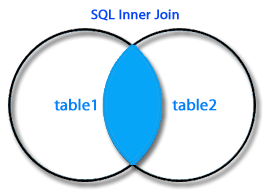

In [13]:
query = '''
SELECT
    product.product_id,
    product.product_name,
    product.product_category_id AS product_prod_cat_id,
    
    product_category.product_category_id AS category_prod_cat_id,
    product_category.product_category_name
FROM farmers_market.product
INNER JOIN farmers_market.product_category
    ON product.product_category_id = product_category.product_category_id;
'''

cursor = conn.cursor()
cursor.execute(query)
df_inner_join = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.close()

df_inner_join

,product_id,product_name,product_prod_cat_id,category_prod_cat_id,product_category_name
0,1,Habanero Peppers - Organic,1,1,Fresh Fruits & Vegetables
1,2,Jalapeno Peppers - Organic,1,1,Fresh Fruits & Vegetables
2,3,Poblano Peppers - Organic,1,1,Fresh Fruits & Vegetables
3,9,Sweet Potatoes,1,1,Fresh Fruits & Vegetables
4,12,Baby Salad Lettuce Mix - Bag,1,1,Fresh Fruits & Vegetables
5,13,Baby Salad Lettuce Mix,1,1,Fresh Fruits & Vegetables
6,14,Red Potatoes,1,1,Fresh Fruits & Vegetables
7,15,Red Potatoes - Small,1,1,Fresh Fruits & Vegetables
8,16,Sweet Corn,1,1,Fresh Fruits & Vegetables
9,17,Carrots,1,1,Fresh Fruits & Vegetables


## 4. Three-Table JOIN

Retrieve transaction data joined with both customer and vendor details.

In [16]:
query = '''
SELECT
    c_p.transaction_time,
    c.customer_first_name,
    c.customer_last_name,
    v.vendor_name
FROM farmers_market.customer_purchases AS c_p
LEFT JOIN farmers_market.customer AS c
    ON c_p.customer_id = c.customer_id
LEFT JOIN farmers_market.vendor AS v
    ON c_p.vendor_id = v.vendor_id;
'''

cursor = conn.cursor()
cursor.execute(query)
df_three_join = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.close()

df_three_join.head()

,transaction_time,customer_first_name,customer_last_name,vendor_name
0,0 days 12:48:00,Jane,Connor,Marco's Peppers
1,0 days 13:00:00,Jane,Connor,Marco's Peppers
2,0 days 13:03:00,Jane,Connor,Marco's Peppers
3,0 days 18:45:00,Jane,Connor,Marco's Peppers
4,0 days 18:56:00,Jane,Connor,Marco's Peppers
